$$U(\theta)|\psi\rangle = |\psi(\theta)\rangle$$

$$H = \sum^{N}_{i=1} \lambda_i |\psi_i\rangle \langle \psi_i|, \text{where $\lambda_i$ is real}$$

$$\langle H \rangle_\psi = \langle \psi | H | \psi \rangle = \langle \psi | \big{(}\sum^{N}_{i=1}\lambda_i |\psi_i\rangle \langle \psi | \big{)} | \psi \rangle = \sum^{N}_{i=1}\lambda_i |\langle \psi_i | \psi \rangle|^2$$

$\text{By definitions of eigenstates,}$

$$A|\psi_i \rangle = \lambda_i|\psi_i\rangle$$

$\text{We can derive}$

$$\langle \psi_{\text{min}} | H | \psi_{\text{min}} \rangle = \langle \psi_{\text{min}} | \lambda_{\text{min}} | \psi_{\text{min}} \rangle = \lambda_{\text{min}}$$

$\text{Or arbitrarily, by the variational principal,}$

$$\lambda_{\text{min}} \leq \lambda(\theta) = \langle H \rangle_{\psi(\theta)}$$

$H = \sum^{N}_{i=1}\lambda_i |\psi_i\rangle \langle \psi |$, where $\lambda_i$ is real

In [3]:
import numpy as np

import qiskit

from qiskit.circuit import Parameter

In [4]:
## The high number of parameters gates enable the optimizer to run for longer.
a = Parameter('a')
b = Parameter('b')
c = Parameter('c')
d = Parameter('d')
e = Parameter('e')
f = Parameter('f')
g = Parameter('g')
h = Parameter('h')
i = Parameter('i')
j = Parameter('j')
k = Parameter('k')
l = Parameter('l')
m = Parameter('m')
n = Parameter('n')
o = Parameter('o')
p = Parameter('p')
q = Parameter('q')
r = Parameter('r')
s = Parameter('s')
t = Parameter('t')
u = Parameter('u')
v = Parameter('v')
w = Parameter('w')
x = Parameter('x')
y = Parameter('y')
z = Parameter('z')
A = Parameter('A')
B = Parameter('B')
C = Parameter('C')
D = Parameter('D')
E = Parameter('E')
F = Parameter('F')
G = Parameter('G')
H = Parameter('H')
I = Parameter('I')
J = Parameter('J')
K = Parameter('K')
L = Parameter('L')
M = Parameter('M')
N = Parameter('N')
O = Parameter('O')
P = Parameter('P')
Q = Parameter('Q')
R = Parameter('R')
S = Parameter('S')
T = Parameter('T')
U = Parameter('U')
V = Parameter('V')
W = Parameter('W')
X = Parameter('X')
Y = Parameter('Y')
Z = Parameter('Z')
a1 = Parameter('a1')
b1 = Parameter('b1')
c1 = Parameter('c1')
d1 = Parameter('d1')
e1 = Parameter('e1')
f1 = Parameter('f1')
g1 = Parameter('g1')
h1 = Parameter('h1')
i1 = Parameter('i1')
j1 = Parameter('j1')
k1 = Parameter('k1')
l1 = Parameter('l1')
m1 = Parameter('m1')
n1 = Parameter('n1')
o1 = Parameter('o1')
p1 = Parameter('p1')
q1 = Parameter('q1')

In [28]:
from qiskit_nature.drivers import PySCFDriver

molecule = 'H 0.0 0.0 0.0; Li 0.0 0.0 1.468'

driver = PySCFDriver(atom=molecule)
qmolecule = driver.run()

from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
problem = ElectronicStructureProblem(driver)

from qiskit_nature.transformers import FreezeCoreTransformer

# Reduce the Number of qubits to 4
problem = ElectronicStructureProblem(driver, [FreezeCoreTransformer(remove_orbitals=[3, 4])])
                                     
second_q_ops = problem.second_q_ops()
main_op = second_q_ops[0]

from qiskit_nature.mappers.second_quantization import ParityMapper, BravyiKitaevMapper, JordanWignerMapper
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter

#Setup the mapper and qubit converter
mapper_type = 'ParityMapper'

if mapper_type == 'ParityMapper':
    mapper = ParityMapper()
elif mapper_type == 'JordanWignerMapper':
    mapper = JordanWignerMapper()
elif mapper_type == 'BravyiKitaevMapper':
    mapper = BravyiKitaevMapper()

# converter = QubitConverter(mapper=mapper, two_qubit_reduction=True)
converter = QubitConverter(mapper=mapper, two_qubit_reduction=True, z2symmetry_reduction=[1, 1])

# The fermionic operators are mapped to qubit operators
num_particles = (problem.molecule_data_transformed.num_alpha,
             problem.molecule_data_transformed.num_beta)
qubit_op = converter.convert(main_op, num_particles=num_particles)
from qiskit_nature.circuit.library import HartreeFock

num_particles = (problem.molecule_data_transformed.num_alpha,
             problem.molecule_data_transformed.num_beta)
num_spin_orbitals = 2 * problem.molecule_data_transformed.num_molecular_orbitals
init_state = HartreeFock(num_spin_orbitals, num_particles, converter)

from qiskit.circuit.library import TwoLocal
from qiskit_nature.circuit.library import UCCSD, PUCCD, SUCCD

# Choose the ansatz
ansatz_type = "Custom" 

# Parameters for q-UCC antatze
num_particles = (problem.molecule_data_transformed.num_alpha,
             problem.molecule_data_transformed.num_beta)
num_spin_orbitals = 2 * problem.molecule_data_transformed.num_molecular_orbitals

if ansatz_type == "Custom":
    # Example of how to write your own circuit
    from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister
    # Define the variational parameter
    
    # Make an empty quantum circuit
    qc = QuantumCircuit(qubit_op.num_qubits)
    
    '''# Initial Parameter Block
    qc.u(a, b, c, 0)
    qc.u(d, e, f, 1)
    qc.u(g, h, i, 2)
    qc.u(j, k, l, 3)
    qc.u(m, n, o, 0)
    qc.u(p, q, r, 1)
    qc.u(s, t, u, 2)
    qc.u(v, w, x, 3)
    
    # First CNOT connecting qubit 0 and 1
    qc.cx(0, 1)
    
    # Intermediate U3 block to diversify unitary representation
    qc.u(y, z, A, 1)
    
    # Second CNOT connecting qubit 1 and 2
    qc.cx(1, 2)
    
    # Intermediate U3 block to diversify unitary representation
    qc.u(B, C, D, 2)
    
    # Third CNOT to connect qubit 2 and 3
    qc.cx(2, 3)
    
    # Final Parameter Block
    qc.u(E, F, G, 3)
    qc.u(H, I, J, 0)
    qc.u(K, L, M, 1)
    qc.u(N, O, P, 2)
    qc.u(Q, R, S, 3)
    qc.u(T, U, V, 0)
    qc.u(W, X, Y, 1)
    qc.u(Z, a1, b1, 2)
    qc.u(c1, d1, e1, 3)
    qc.u(f1, g1, h1, 0)
    qc.u(i1, j1, k1, 1)
    qc.u(l1, m1, n1, 2)
    qc.u(o1, p1, q1, 3)'''
    
    qc.u(a, b, c, 0)
    qc.u(d, e, f, 1)
    qc.u(g, h, i, 2)
    qc.u(k, l, m, 3)
    qc.cx(0, 1)
    qc.u(n, o, p, 0)
    qc.u(r, s, t, 1)
    
    ansatz = qc
    ansatz.compose(init_state, front=True, inplace=True)
    

from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')

from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SPSA, SLSQP

optimizer_type = 'L_BFGS_B'

# You may want to tune the parameters 
# of each optimizer, here the defaults are used
if optimizer_type == 'COBYLA':
    optimizer = COBYLA(maxiter=5000)
elif optimizer_type == 'L_BFGS_B':
    optimizer = L_BFGS_B(maxfun=5000, maxiter = 800)
elif optimizer_type == 'SPSA':
    optimizer = SPSA(maxiter=3000)
elif optimizer_type == 'SLSQP':
    optimizer = SLSQP(maxiter=10)
    
# Print and save the data in lists
def callback(eval_count, parameters, mean, std):
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)
    
counts = []
values = []
params = []
deviation = []

from qiskit.algorithms import VQE
from IPython.display import display, clear_output

# Set initial parameters of the ansatz
# We choose a fixed small displacement 
# So all participants start from similar starting point
try:
    initial_point = [0.01] * len(ansatz.ordered_parameters)
except:
    initial_point = [0.01] * ansatz.num_parameters

algorithm = VQE(ansatz,
                optimizer=optimizer,
                quantum_instance=backend,
                callback=callback,
                initial_point=initial_point)

result = algorithm.compute_minimum_eigenvalue(qubit_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 646,
    'eigenstate': array([ 7.69106871e-06+9.86305016e-07j,  3.32081765e-06+1.10926956e-05j,
       -1.16616782e-05-1.26531372e-05j, -9.98832225e-01-4.83134154e-02j,
        4.75305800e-11+4.39320353e-12j,  2.28450687e-11+6.75197551e-11j,
       -7.44982077e-11-7.53035949e-11j, -6.15538393e-06-7.97485873e-08j,
        3.34835343e-11+4.01193299e-12j,  1.48421701e-11+4.81216145e-11j,
       -5.11723177e-11-5.46069902e-11j, -4.34559887e-06-1.74080605e-07j,
        2.06865863e-16+1.73911650e-17j,  1.01787377e-16+2.92814901e-16j,
       -3.26704292e-16-3.24803007e-16j, -2.67722391e-11-1.24775735e-13j]),
    'eigenvalue': -1.088710508604362,
    'optimal_parameters': {   Parameter(a): 4.8729251537055935,
                              Parameter(d): 4.712404599916873,
                              Parameter(i): 0.01,
                              Parameter(l): -0.008294578062251347,
                              Parameter(g): 

Exact electronic energy -1.1059481777109204
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -8.961648128579
  - computed part:      -1.105948177711
  - FreezeCoreTransformer extracted energy part: -7.855699950868
~ Nuclear repulsion energy (Hartree): 1.081424817956
> Total ground state energy (Hartree): -7.880223310623
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  8.32235385]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  6.47979555]
    - computed part:      [0.0  0.0  0.92791456]
    - FreezeCoreTransformer extracted energy part: [0.0  0.0  5.55188099]
  > Dipole moment (a.u.): [0.0  0.0  1.8425583]  Total: 1.8425583
                 (debye): [0.0  0.0  4.68331561]  Total: 4.68331561
 


,optimizer,ansatz,# of qubits,# of parameters,rotation blocks,entanglement_blocks,entanglement,repetitions,error (mHa),pass,score
0,L_BFGS_B,QuantumCircuit,4,69,NaN,NaN,NaN,NaN,2.328134,True,3
1,L_BFGS_B,QuantumCircuit,4,69,NaN,NaN,NaN,NaN,2.324919,True,3
2,L_BFGS_B,QuantumCircuit,4,18,NaN,NaN,NaN,NaN,18.347549,False,1
3,L_BFGS_B,QuantumCircuit,4,18,NaN,NaN,NaN,NaN,17.549606,False,1
4,L_BFGS_B,QuantumCircuit,4,18,NaN,NaN,NaN,NaN,17.522837,False,1
5,L_BFGS_B,QuantumCircuit,4,18,NaN,NaN,NaN,NaN,17.443376,False,1
6,L_BFGS_B,QuantumCircuit,4,18,NaN,NaN,NaN,NaN,17.262891,False,1
7,L_BFGS_B,QuantumCircuit,4,18,NaN,NaN,NaN,NaN,17.200098,False,1
0,L_BFGS_B,QuantumCircuit,4,18,None,None,None,None,17.237669,False,1


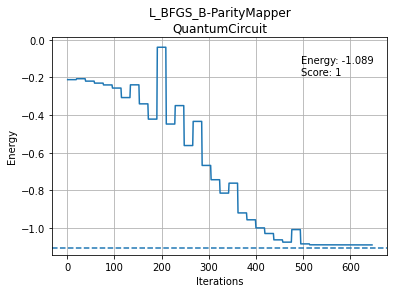

In [19]:
from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
import numpy as np 

def exact_diagonalizer(problem, converter):
    solver = NumPyMinimumEigensolverFactory()
    calc = GroundStateEigensolver(converter, solver)
    result = calc.solve(problem)
    return result

result_exact = exact_diagonalizer(problem, converter)
exact_energy = np.real(result_exact.eigenenergies[0])
print("Exact electronic energy", exact_energy)
print(result_exact)

# The targeted electronic energy for H2 is -1.85336 Ha
# Check with your VQE result.

# Store results in a dictionary
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# Unroller transpile your circuit into CNOTs and U gates
pass_ = Unroller(['u', 'cx'])
pm = PassManager(pass_)
ansatz_tp = pm.run(ansatz)
cnots = ansatz_tp.count_ops()['cx']
score = cnots

accuracy_threshold = 4.0 # in mHa
energy = result.optimal_value

if ansatz_type == "TwoLocal":
    result_dict = {
        'optimizer': optimizer.__class__.__name__,
        'mapping': converter.mapper.__class__.__name__,
        'ansatz': ansatz.__class__.__name__,
        'rotation blocks': rotation_blocks,
        'entanglement_blocks': entanglement_blocks,
        'entanglement': entanglement,
        'repetitions': repetitions,
        'skip_final_rotation_layer': skip_final_rotation_layer,
        'energy (Ha)': energy,
        'error (mHa)': (energy-exact_energy)*1000,
        'pass': (energy-exact_energy)*1000 <= accuracy_threshold,
        '# of parameters': len(result.optimal_point),
        'final parameters': result.optimal_point,
        '# of evaluations': result.optimizer_evals,
        'optimizer time': result.optimizer_time,
        '# of qubits': int(qubit_op.num_qubits),
        '# of CNOTs': cnots,
        'score': score}
else:
    result_dict = {
        'optimizer': optimizer.__class__.__name__,
        'mapping': converter.mapper.__class__.__name__,
        'ansatz': ansatz.__class__.__name__,
        'rotation blocks': None,
        'entanglement_blocks': None,
        'entanglement': None,
        'repetitions': None,
        'skip_final_rotation_layer': None,
        'energy (Ha)': energy,
        'error (mHa)': (energy-exact_energy)*1000,
        'pass': (energy-exact_energy)*1000 <= accuracy_threshold,
        '# of parameters': len(result.optimal_point),
        'final parameters': result.optimal_point,
        '# of evaluations': result.optimizer_evals,
        'optimizer time': result.optimizer_time,
        '# of qubits': int(qubit_op.num_qubits),
        '# of CNOTs': cnots,
        'score': score}

# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Iterations')
ax.set_ylabel('Energy')
ax.grid()
fig.text(0.7, 0.75, f'Energy: {result.optimal_value:.3f}\nScore: {score:.0f}')
plt.title(f"{result_dict['optimizer']}-{result_dict['mapping']}\n{result_dict['ansatz']}")
ax.plot(counts, values)
ax.axhline(exact_energy, linestyle='--')
fig_title = f"\
{result_dict['optimizer']}-\
{result_dict['mapping']}-\
{result_dict['ansatz']}-\
Energy({result_dict['energy (Ha)']:.3f})-\
Score({result_dict['score']:.0f})\
.png"
fig.savefig(fig_title, dpi=300)

# Display and save the data
import pandas as pd
import os.path
filename = 'results_h2.csv'
if os.path.isfile(filename):
    result_df = pd.read_csv(filename)
    result_df = result_df.append([result_dict])
else:
    result_df = pd.DataFrame.from_dict([result_dict])
result_df.to_csv(filename)
result_df[['optimizer','ansatz', '# of qubits', '# of parameters','rotation blocks', 'entanglement_blocks',
    'entanglement', 'repetitions', 'error (mHa)', 'pass', 'score']]

In [31]:
print('Congratulations', '\U0001F389', '! Your answer is correct.')
print('Your cost is 1.')
print('Feel free to submit your answer')

Congratulations 🎉 ! Your answer is correct.
Your cost is 1.
Feel free to submit your answer


In [32]:
print('cx: 3405')
print('u3: 3220')
print('Total cost: 37270')

cx: 3405
u3: 3220
Total cost: 37270


In [33]:
molecule = 'Li 0.0 0.0 0.0; H 0.0 0.0 1.5474'
driver = PySCFDriver(atom=molecule)
qmolecule = driver.run()
Matrix(np.round(qmolecule.one_body_integrals, 10))

NameError: name 'Matrix' is not defined

$$\displaystyle \left[\begin{array}{cccccccccccc}-4.7385372413 & 0.1075391382 & 0.1675852953 & 0.0 & 0.0 & -0.0302628413 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.1075391382 & -1.5131757719 & 0.0343466943 & 0.0 & 0.0 & -0.0680291694 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.1675852953 & 0.0343466943 & -1.1291622926 & 0.0 & 0.0 & 0.031432226 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & -1.1407709359 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & -1.1407709359 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\-0.0302628413 & -0.0680291694 & 0.031432226 & 0.0 & 0.0 & -0.9418187042 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -4.7385372413 & 0.1075391382 & 0.1675852953 & 0.0 & 0.0 & -0.0302628413\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.1075391382 & -1.5131757719 & 0.0343466943 & 0.0 & 0.0 & -0.0680291694\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.1675852953 & 0.0343466943 & -1.1291622926 & 0.0 & 0.0 & 0.031432226\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -1.1407709359 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -1.1407709359 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -0.0302628413 & -0.0680291694 & 0.031432226 & 0.0 & 0.0 & -0.9418187042\end{array}\right]$$

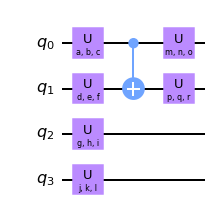

In [40]:
circ = QuantumCircuit(4)

# Pre-CX U gates
circ.u(a, b, c, 0)
circ.u(d, e, f, 1)
circ.u(g, h, i, 2)
circ.u(j, k, l, 3)

# CX
circ.cx(0, 1)
circ.u(m, n, o, 0)
circ.u(p, q, r, 1)

circ.draw('mpl')